<a href="https://colab.research.google.com/github/30Umamaheswari/HouseRent/blob/main/HouseRent_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Importing

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


# Additional settings for visualization
%matplotlib inline
sns.set(style="whitegrid")


In [ ]:
train_data = pd.read_excel('HR_Train.xlsx')
train_data.head(3)

In [ ]:
train_data.isnull().sum()

In [ ]:
train_data.shape

In [ ]:
train_data.dtypes

In [ ]:
train_data.columns

In [ ]:
test_data = pd.read_excel('HR_Test.xlsx')
test_data.head(3)

In [ ]:
test_data.isnull().sum()

In [ ]:
test_data.shape

In [ ]:
train_data['House Type'].unique()

array(['BHK2', 'BHK3', 'BHK1', 'RK1', 'BHK4', 'BHK4PLUS'], dtype=object)

In [ ]:
train_data['House Type'] = train_data['House Type'].replace({'bhk2': 'BHK2', 'bhk3': 'BHK3'})


In [ ]:
test_data['House Type'].unique()

array(['BHK2', 'BHK1', 'BHK3', 'RK1', 'BHK4', 'BHK4PLUS'], dtype=object)

### Outliers

# Training the Data

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler


In [ ]:
# @title Label encoding for Categorical Variable

import pickle

# Encode and Dump 'House Facing' Categorical values
house_facing = train_data['House Facing']
house_facing_label_encoder = LabelEncoder()
House_Facing_Label = house_facing_label_encoder.fit_transform(house_facing)

with open('house_facing_label.pkl', 'wb') as file:
    pickle.dump(house_facing_label_encoder, file)


# Encode and Dump 'House Type' Categorical values
house_type = train_data['House Type']
house_type_label_encoder = LabelEncoder()
House_Type_Label = house_type_label_encoder.fit_transform(house_type)

with open('house_type_label.pkl', 'wb') as file:
    pickle.dump(house_type_label_encoder, file)


# Encode and Dump 'Lease Type' Categorical values
lease_type = train_data['Lease Type']
lease_type_label_encoder = LabelEncoder()
Lease_Type_Label = lease_type_label_encoder.fit_transform(lease_type)

with open('lease_type_label.pkl', 'wb') as file:
    pickle.dump(lease_type_label_encoder, file)


# Encode and Dump 'Furnishing' Categorical values
furnishing = train_data['Furnishing']
furnishing_label_encoder = LabelEncoder()
Furnishing_Label = furnishing_label_encoder.fit_transform(furnishing)

with open('furnishing_label.pkl', 'wb') as file:
    pickle.dump(furnishing_label_encoder, file)


# Encode and Dump 'Parking' Categorical values
Parking = train_data['Parking']
Parking_label_encoder = LabelEncoder()
Parking_Label = Parking_label_encoder.fit_transform(Parking)

with open('Parking_label.pkl', 'wb') as file:
    pickle.dump(Parking_label_encoder, file)


# Encode and Dump 'Water Supply' Categorical values
Water_Supply = train_data['Water Supply']
Water_Supply_label_encoder = LabelEncoder()
Water_Supply_Label = Water_Supply_label_encoder.fit_transform(Water_Supply)

with open('Water_Supply_label.pkl', 'wb') as file:
    pickle.dump(Water_Supply_label_encoder, file)


# Encode and Dump 'Building Type' Categorical values
Building_Type = train_data['Building Type']
Building_Type_label_encoder = LabelEncoder()
Building_Type_Label = Building_Type_label_encoder.fit_transform(Building_Type)

with open('Building_Type_label.pkl', 'wb') as file:
    pickle.dump(Building_Type_label_encoder, file)


In [ ]:
train_data.shape

(20377, 47)

In [ ]:
x_all = train_data[['Negotiable', 'Property Size', 'Property Age', 'No of Bathroom', 'No of Cup Board',
                'Floor No ', 'Total No of Floor', 'Balconies', 'Lift', 'Gym', 'Internet', 'Air Conditioning', 'Club', 'Intercom', 'Swimming Pool',
                'Car Parking', 'Servent', 'Security', 'Shopping Center', 'Gas Pipeline', 'Park', 'Rain Water Harvesting',
                'Sewage Treatment Plant', 'House Keeping', 'Power Backup', 'Visitor Parking', 'House Facing Label', 'House Type Label', 'Lease Type Label', 'Furnishing Label',
                'Parking Label', 'Water Supply Label', 'Building Type Label']]


In [ ]:
from scipy.stats import zscore

z_scores = zscore(x_all)

threshold = 3
outliers = (np.abs(z_scores) > threshold).any(axis=1)

In [ ]:
# print(outliers)
cleaned_train_data = train_data[~outliers]

In [ ]:
cleaned_train_data.shape

(15376, 47)

In [ ]:
# @title Test Data Encoding

# Load House Facing
test_house_facing = test_data['House Facing']

with open('house_facing_label.pkl', 'rb') as file_hf:
    loaded_house_facing_label_encoder = pickle.load(file_hf)

House_Facing_Lab = loaded_house_facing_label_encoder.transform(test_house_facing)

# Load House type
test_house_type = test_data['House Type']

with open('house_type_label.pkl', 'rb') as file_ht:
    loaded_house_type_label_encoder = pickle.load(file_ht)

House_Type_Lab = loaded_house_type_label_encoder.transform(test_house_type)

# Load Lease type
test_lease_type = test_data['Lease Type']

with open('lease_type_label.pkl', 'rb') as file_lt:
    loaded_lease_type_label_encoder = pickle.load(file_lt)

Lease_Type_Lab = loaded_lease_type_label_encoder.transform(test_lease_type)

# Load Furnishing
test_Furnishing = test_data['Furnishing']

with open('furnishing_label.pkl', 'rb') as file_f:
    loaded_Furnishing_label_encoder = pickle.load(file_f)

Furnishing_Lab = loaded_Furnishing_label_encoder.transform(test_Furnishing)

# Load Parking
test_Parking = test_data['Parking']

with open('Parking_label.pkl', 'rb') as file_p:
    loaded_Parking_label_encoder = pickle.load(file_p)

Parking_Lab = loaded_Parking_label_encoder.transform(test_Parking)

# Load Water Supply
test_Water_Supply = test_data['Water Supply']

with open('Water_Supply_label.pkl', 'rb') as file_ws:
    loaded_Water_Supply_label_encoder = pickle.load(file_ws)

Water_Supply_Lab = loaded_Water_Supply_label_encoder.transform(test_Water_Supply)

# Load Building Type
test_Building_Type = test_data['Building Type']

with open('Building_Type_label.pkl', 'rb') as file_ws:
    loaded_Building_Type_label_encoder = pickle.load(file_ws)

Building_Type_Lab = loaded_Building_Type_label_encoder.transform(test_Building_Type)


In [ ]:
test_data.shape

(4500, 46)

In [ ]:
X_ALL = test_data[['Negotiable', 'Property Size', 'Property Age', 'No of Bathroom', 'No of Cup Board',
                'Floor No ', 'Total No of Floor', 'Balconies', 'Lift', 'Gym', 'Internet', 'Air Conditioning', 'Club', 'Intercom', 'Swimming Pool',
                'Car Parking', 'Servent', 'Security', 'Shopping Center', 'Gas Pipeline', 'Park', 'Rain Water Harvesting',
                'Sewage Treatment Plant', 'House Keeping', 'Power Backup', 'Visitor Parking', 'House Facing Label', 'House Type Label', 'Lease Type Label', 'Furnishing Label',
                'Parking Label', 'Water Supply Label', 'Building Type Label']]

In [ ]:
from scipy.stats import zscore

z_scores_test = zscore(X_ALL)

threshold = 3
outliers_test = (np.abs(z_scores_test) > threshold).any(axis=1)

In [ ]:
# print(outliers)
cleaned_test_data = test_data[~outliers_test]

In [ ]:
cleaned_test_data.shape

(3656, 46)

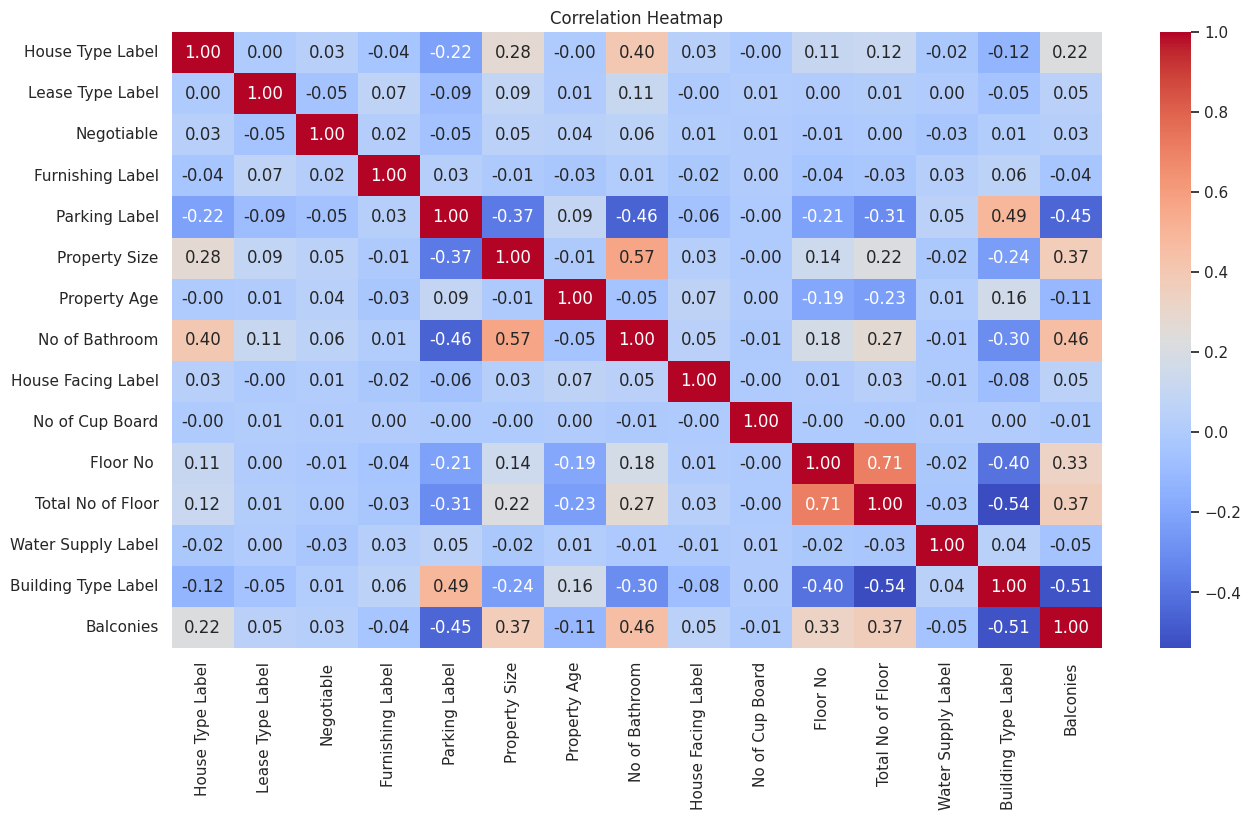

In [ ]:
# @title Correlation of Features for House

h = X[['House Type Label', 'Lease Type Label', 'Negotiable', 'Furnishing Label', 'Parking Label','Property Size',
      'Property Age', 'No of Bathroom', 'House Facing Label', 'No of Cup Board', 'Floor No ', 'Total No of Floor', 'Water Supply Label',
     'Building Type Label', 'Balconies']]

correlation_matrix = h.corr()
plt.figure(figsize=(15, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()


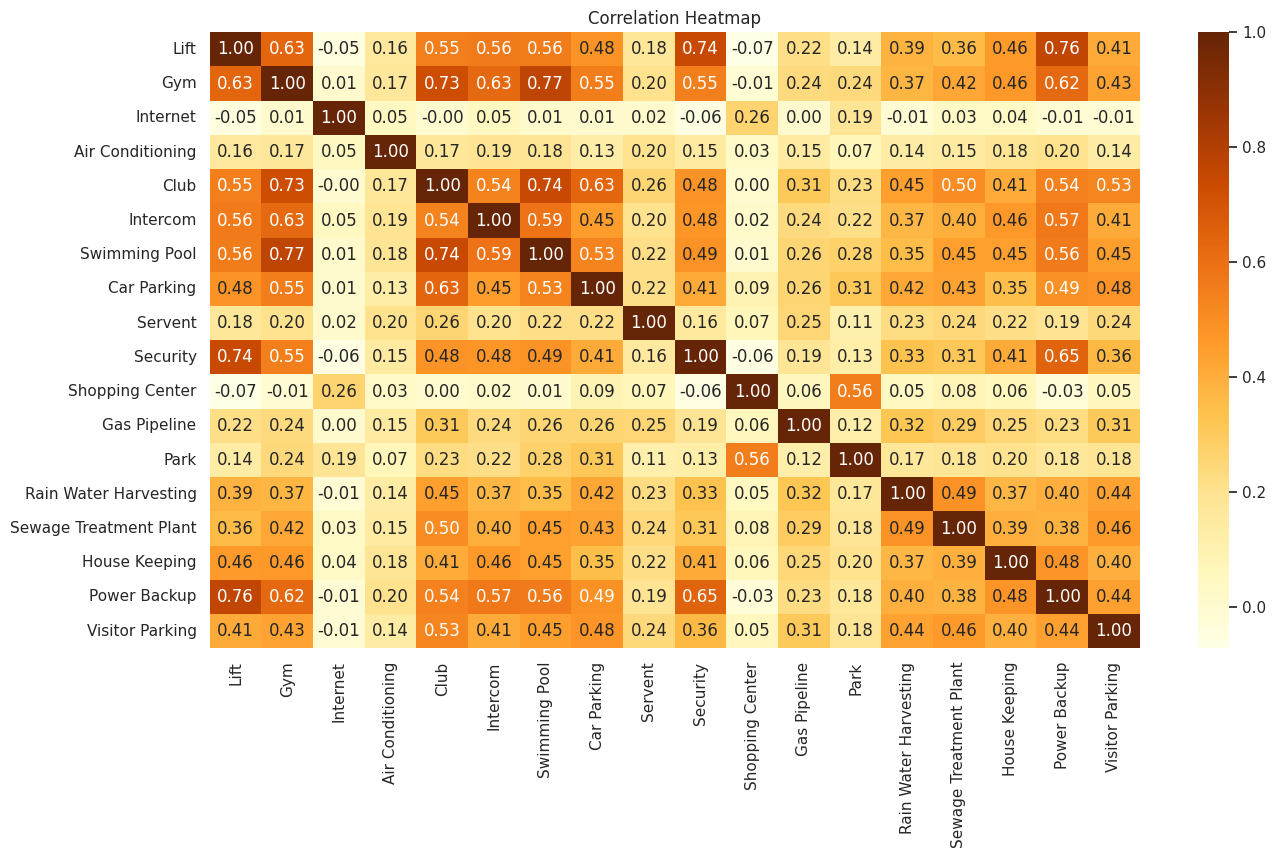

In [ ]:
# @title Correlation of Features for Amenities

a = X[['Lift', 'Gym', 'Internet', 'Air Conditioning', 'Club', 'Intercom', 'Swimming Pool', 'Car Parking',
    'Servent', 'Security', 'Shopping Center', 'Gas Pipeline', 'Park', 'Rain Water Harvesting', 'Sewage Treatment Plant',
     'House Keeping', 'Power Backup', 'Visitor Parking']]

correlation_matrix = a.corr()
plt.figure(figsize=(15, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='YlOrBr', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()



In [ ]:
# @title Choose the Features and Target variable

trai_data, val_data = train_test_split(cleaned_train_data, test_size=0.2, random_state=42)

X = trai_data[['Negotiable', 'Property Size', 'Property Age', 'No of Bathroom', 'No of Cup Board',
                'Floor No ', 'Total No of Floor', 'Balconies', 'Lift', 'Gym', 'Internet', 'Air Conditioning', 'Club', 'Intercom', 'Swimming Pool',
                'Car Parking', 'Servent', 'Security', 'Shopping Center', 'Gas Pipeline', 'Park', 'Rain Water Harvesting',
                'Sewage Treatment Plant', 'House Keeping', 'Power Backup', 'Visitor Parking', 'House Facing Label', 'House Type Label', 'Lease Type Label', 'Furnishing Label',
                'Parking Label', 'Water Supply Label', 'Building Type Label']]

# Y =trai_data[['Rent']]

In [ ]:
scaler = MinMaxScaler()
Y_scaled = scaler.fit_transform(trai_data[['Rent']].values.reshape(-1, 1))


In [ ]:
# @title Train the Model

house_model = LinearRegression()
house_model.fit(X, Y_scaled)

LinearRegression()

In [ ]:
X_val = val_data[['Negotiable', 'Property Size', 'Property Age', 'No of Bathroom', 'No of Cup Board',
                'Floor No ', 'Total No of Floor', 'Balconies', 'Lift', 'Gym', 'Internet', 'Air Conditioning', 'Club', 'Intercom', 'Swimming Pool',
                'Car Parking', 'Servent', 'Security', 'Shopping Center', 'Gas Pipeline', 'Park', 'Rain Water Harvesting',
                'Sewage Treatment Plant', 'House Keeping', 'Power Backup', 'Visitor Parking', 'House Facing Label', 'House Type Label', 'Lease Type Label', 'Furnishing Label',
                'Parking Label', 'Water Supply Label', 'Building Type Label']]

y_val = val_data['Rent'].values.reshape(-1, 1)
# y_val_pred = house_model.predict(X_val)

In [ ]:
y_val_pred_scaled = house_model.predict(X_val)
y_val_pred = scaler.inverse_transform(y_val_pred_scaled.reshape(-1, 1))


In [ ]:
mse_val = mean_squared_error(y_val, y_val_pred)
print(f"Mean Squared Error on Validation Data: {mse_val}")

Mean Squared Error on Validation Data: 19089237.257525064


In [ ]:
final_model = LinearRegression()
final_model.fit(cleaned_train_data[['Negotiable', 'Property Size', 'Property Age', 'No of Bathroom', 'No of Cup Board',
                'Floor No ', 'Total No of Floor', 'Balconies', 'Lift', 'Gym', 'Internet', 'Air Conditioning', 'Club', 'Intercom', 'Swimming Pool',
                'Car Parking', 'Servent', 'Security', 'Shopping Center', 'Gas Pipeline', 'Park', 'Rain Water Harvesting',
                'Sewage Treatment Plant', 'House Keeping', 'Power Backup', 'Visitor Parking', 'House Facing Label', 'House Type Label', 'Lease Type Label', 'Furnishing Label',
                'Parking Label', 'Water Supply Label', 'Building Type Label']], cleaned_train_data['Rent'])


LinearRegression()

In [ ]:
X_test = cleaned_test_data[['Negotiable', 'Property Size', 'Property Age', 'No of Bathroom', 'No of Cup Board',
                'Floor No ', 'Total No of Floor', 'Balconies', 'Lift', 'Gym', 'Internet', 'Air Conditioning', 'Club', 'Intercom', 'Swimming Pool',
                'Car Parking', 'Servent', 'Security', 'Shopping Center', 'Gas Pipeline', 'Park', 'Rain Water Harvesting',
                'Sewage Treatment Plant', 'House Keeping', 'Power Backup', 'Visitor Parking', 'House Facing Label', 'House Type Label', 'Lease Type Label', 'Furnishing Label',
                'Parking Label', 'Water Supply Label', 'Building Type Label']]
y_test_pred = final_model.predict(X_test)


In [ ]:
from sklearn.ensemble import RandomForestRegressor

# ... (your preprocessing and feature selection code)

# Create a Random Forest Regressor model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the Random Forest Regressor model
rf_model.fit(X, Y_scaled)

# Make predictions on the validation set
y_val_pred_rf = rf_model.predict(X_val)

# Evaluate the model
mse_val_rf = mean_squared_error(y_val, y_val_pred_rf)
print(f"Mean Squared Error on Validation Data (Random Forest): {mse_val_rf}")

# Make predictions on the test set
y_test_pred_rf = rf_model.predict(X_test)


<ipython-input-140-dbd9089808e8>:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf_model.fit(X, Y_scaled)


Mean Squared Error on Validation Data (Random Forest): 359186011.0910973


In [ ]:
# @title Model Prediction

y_pred = house_model.predict(X_test)


In [ ]:
# @title Model Evalution

mse = mean_squared_error(y_test_pred, y_pred)
print(f'Mean Squared Error: {mse}')

Mean Squared Error: 342312146.5985993


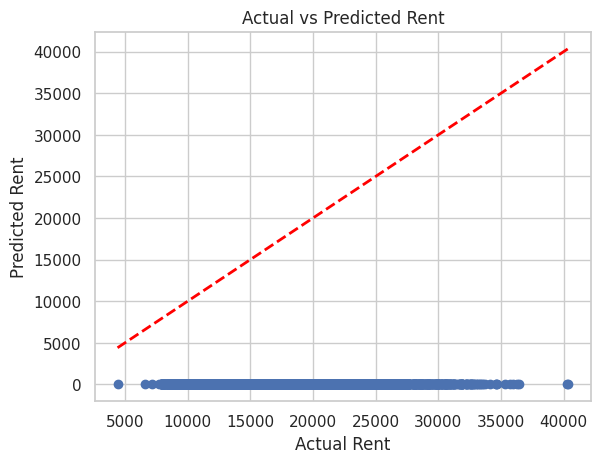

In [ ]:
# @title Visualize predictions

plt.scatter(y_test_pred, y_pred)
plt.xlabel('Actual Rent')
plt.ylabel('Predicted Rent')
plt.title('Actual vs Predicted Rent')

plt.plot([min(y_test_pred), max(y_test_pred)], [min(y_test_pred), max(y_test_pred)], linestyle='--', color='red', linewidth=2)  # Diagonal line for reference

plt.show()

In [ ]:
# Calculate the mean of "Rent"
mean_rent = Y.mean()

# Print the mean and MSE
print(f"Mean of 'Rent': {mean_rent}")
print(f"Mean Squared Error: {mse}")


Mean of 'Rent': Rent    19054.28851
dtype: float64
Mean Squared Error: 342312146.5985993


In [ ]:
from sklearn.metrics import mean_absolute_error, r2_score

baseline_predictions = [trai_data['Rent'].mean()] * len(y_test_pred)

baseline_mse = mean_squared_error(y_test_pred, baseline_predictions)

mae = mean_absolute_error(y_test_pred, y_pred)

r_squared = r2_score(y_test_pred, y_pred)


print(f"Baseline MSE: {baseline_mse}")
print(f"MAE: {mae}")
print(f"R-squared: {r_squared}")

Baseline MSE: 64714234.230723225
MAE: 106.75004746422337
R-squared: 0.9994716876847853


# Model Saving

In [ ]:
import pickle

with open('house_model.pkl', 'wb') as model_file:
    pickle.dump(final_model, model_file)

In [ ]:
with open('house_model_and_encoders.pkl', 'wb') as file:
    pickle.dump({
        'model': house_model,
        'house_facing_label_encoder': house_facing_label_encoder,
        'house_type_label_encoder': house_type_label_encoder,
        'lease_type_label_encoder': lease_type_label_encoder,
        'furnishing_label_encoder': furnishing_label_encoder,
        'parking_label_encoder': Parking_label_encoder,
        'water_supply_label_encoder': Water_Supply_label_encoder,
        'building_type_label_encoder': Building_Type_label_encoder
        # Add other label encoders as needed
    }, file)